In [1]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

import matplotlib.pyplot as plt 
import numpy as np 
import os
import tensorflow as tf

# seed 값 설정
seed = 0
np. random.seed (seed)
tf. random.set_seed (seed)

In [2]:
fashion_mnist = tf.keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
                'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [4]:
X_train = train_images.reshape(train_images.shape[0], 28, 28, 1).astype('float32') / 255
X_test = test_images.reshape(test_images.shape[0], 28, 28, 1). astype('float32') / 255
Y_train = tf.keras.utils.to_categorical(train_labels)
Y_test = tf.keras.utils.to_categorical(test_labels)

In [5]:
# 컨볼루션 신경망 설정
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), input_shape=(28, 28, 1), activation='relu'))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=2))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

model.compile(loss='categorical_crossentropy',
                optimizer='adam',
                metrics=['accuracy'])

In [6]:
MODEL_DIR = 'model/' 
if not os.path.exists(MODEL_DIR):
    os.mkdir (MODEL_DIR)
modelpath="model/{epoch:02d}-{val_loss:.4f}.keras"
checkpointer = ModelCheckpoint(filepath=modelpath, monitor='val_loss', verbose=1,
                                save_best_only=True)
early_stopping_callback = EarlyStopping(monitor='val_loss', patience=10)
# 모델의 실행
history = model.fit(X_train, Y_train, validation_data=(X_test, Y_test), epochs=30,
                    batch_size=200, verbose=0, callbacks=[early_stopping_callback, checkpointer])


Epoch 1: val_loss improved from inf to 0.36481, saving model to model/01-0.3648.keras

Epoch 2: val_loss improved from 0.36481 to 0.29905, saving model to model/02-0.2990.keras

Epoch 3: val_loss improved from 0.29905 to 0.27021, saving model to model/03-0.2702.keras

Epoch 4: val_loss improved from 0.27021 to 0.25543, saving model to model/04-0.2554.keras

Epoch 5: val_loss improved from 0.25543 to 0.24164, saving model to model/05-0.2416.keras

Epoch 6: val_loss improved from 0.24164 to 0.23859, saving model to model/06-0.2386.keras

Epoch 7: val_loss improved from 0.23859 to 0.23060, saving model to model/07-0.2306.keras

Epoch 8: val_loss improved from 0.23060 to 0.22785, saving model to model/08-0.2279.keras

Epoch 9: val_loss improved from 0.22785 to 0.21598, saving model to model/09-0.2160.keras

Epoch 10: val_loss improved from 0.21598 to 0.21528, saving model to model/10-0.2153.keras

Epoch 11: val_loss did not improve from 0.21528

Epoch 12: val_loss did not improve from 0.2

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.9253 - loss: 0.2529

 Test Accuracy: 0.9260


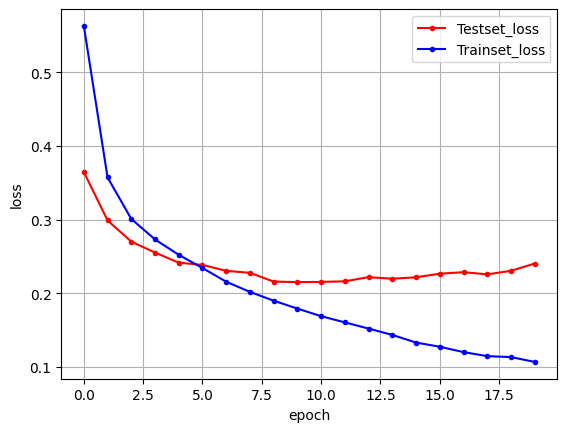

In [7]:
# 테스트 정확도 출력
print("\n Test Accuracy: %.4f" % (model.evaluate(X_test, Y_test) [1]))
# 테스트셋의 오차
y_vloss = history.history['val_loss']
# 학습셋의 오차
y_loss = history.history['loss']
# 그래프로 표현
x_len = np.arange(len(y_loss))
plt.plot(x_len, y_vloss, marker='.', c="red", label='Testset_loss')
plt.plot(x_len, y_loss, marker='.', c="blue", label='Trainset_loss')
# 그래프에 그리드를 주고 레이블을 표시
plt.legend (loc='upper right')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

In [8]:
test_loss, test_acc = model.evaluate(X_test, Y_test, verbose=2)
print('\n테스트 정확도:', test_acc)
# 훈련된 모델을 사용하여 이미지에 대한 예측을 생성
predictions = model. predict (test_images)
# 예측 결과 출력
print(predictions[0])
print(np.argmax(predictions[0])) # 예측된 레이블 출력
print(test_labels[0])# 실제 레이블 출력

313/313 - 1s - 4ms/step - accuracy: 0.9260 - loss: 0.2405

테스트 정확도: 0.9259999990463257
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
9
9


In [9]:
def plot_image(i, predictions_array, true_label, img):
    predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(img, cmap=plt.cm.binary)
    predicted_label = np.argmax(predictions_array)
    if predicted_label == true_label:
        color = 'blue'
    else:
        color = 'red'
    plt.xlabel("{} {:2.0f}% ({}))". format(class_names[predicted_label],
                                    100*np.max(predictions_array),
                                    class_names [true_label]), color=color)
# predictions_array 10개의 실수 결과 값/true_label 분류번호
def plot_value_array(i, predictions_array, true_label):
    predictions_array, true_label = predictions_array[i], true_label[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    thisplot = plt.bar(range(10), predictions_array, color="#777777")
    plt.ylim([0, 1])
    #y축을 0~1 사이로
    predicted_label = np.argmax(predictions_array)
    #올바른 예측은 파랑색 / 잘못된 예측은 빨강색
    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('blue')

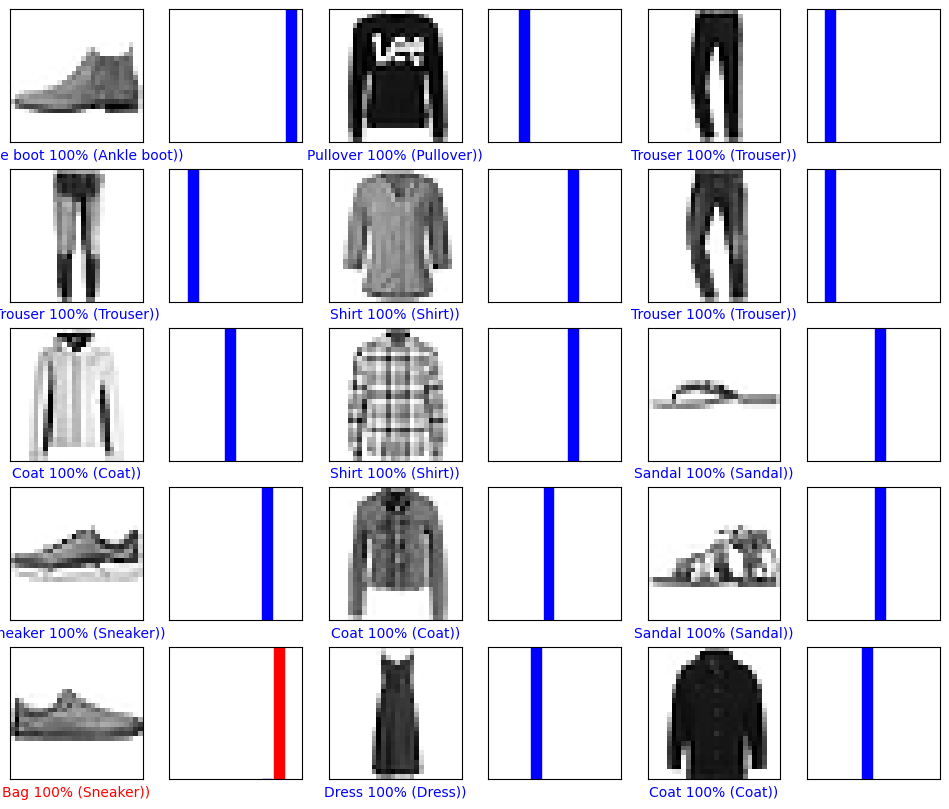

In [10]:
# 처음 X 개의 테스트 이미지와 예측 레이블, 진짜 레이블을 출력합니다
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images): 
    plt.subplot(num_rows, 2*num_cols, 2*i+1)
    plot_image(i, predictions, test_labels, test_images) 
    plt.subplot(num_rows,
    2*num_cols, 2*i+2)
    plot_value_array(i, predictions, test_labels)
plt.show()